In [9]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)

In [10]:
# read the dataset from dir
df = pd.read_csv("/kaggle/input/aids-virus-infection-prediction/AIDS_Classification.csv")
df.head()

,time,trt,age,wtkg,hemo,homo,drugs,karnof,oprior,z30,...,str2,strat,symptom,treat,offtrt,cd40,cd420,cd80,cd820,infected
0,948,2,48,89.8128,0,0,0,100,0,0,...,0,1,0,1,0,422,477,566,324,0
1,1002,3,61,49.4424,0,0,0,90,0,1,...,1,3,0,1,0,162,218,392,564,1
2,961,3,45,88.4520,0,1,1,90,0,1,...,1,3,0,1,1,326,274,2063,1893,0
3,1166,3,47,85.2768,0,1,0,100,0,1,...,1,3,0,1,0,287,394,1590,966,0
4,1090,0,43,66.6792,0,1,0,100,0,1,...,1,3,0,0,0,504,353,870,782,0


In [11]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2139 entries, 0 to 2138
Data columns (total 23 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   time      2139 non-null   int64  
 1   trt       2139 non-null   int64  
 2   age       2139 non-null   int64  
 3   wtkg      2139 non-null   float64
 4   hemo      2139 non-null   int64  
 5   homo      2139 non-null   int64  
 6   drugs     2139 non-null   int64  
 7   karnof    2139 non-null   int64  
 8   oprior    2139 non-null   int64  
 9   z30       2139 non-null   int64  
 10  preanti   2139 non-null   int64  
 11  race      2139 non-null   int64  
 12  gender    2139 non-null   int64  
 13  str2      2139 non-null   int64  
 14  strat     2139 non-null   int64  
 15  symptom   2139 non-null   int64  
 16  treat     2139 non-null   int64  
 17  offtrt    2139 non-null   int64  
 18  cd40      2139 non-null   int64  
 19  cd420     2139 non-null   int64  
 20  cd80      2139 non-null   int6

,time,trt,age,wtkg,hemo,homo,drugs,karnof,oprior,z30,...,str2,strat,symptom,treat,offtrt,cd40,cd420,cd80,cd820,infected
count,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,...,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000
mean,879.098177,1.520804,35.248247,75.125311,0.084151,0.661057,0.131370,95.446470,0.021973,0.550257,...,0.585788,1.979897,0.172978,0.751286,0.362786,350.501169,371.307153,986.627396,935.369799,0.243572
std,292.274324,1.127890,8.709026,13.263164,0.277680,0.473461,0.337883,5.900985,0.146629,0.497584,...,0.492701,0.899053,0.378317,0.432369,0.480916,118.573863,144.634909,480.197750,444.976051,0.429338
min,14.000000,0.000000,12.000000,31.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,49.000000,40.000000,124.000000,0.000000
25%,727.000000,1.000000,29.000000,66.679200,0.000000,0.000000,0.000000,90.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,1.000000,0.000000,263.500000,269.000000,654.000000,631.500000,0.000000
50%,997.000000,2.000000,34.000000,74.390400,0.000000,1.000000,0.000000,100.000000,0.000000,1.000000,...,1.000000,2.000000,0.000000,1.000000,0.000000,340.000000,353.000000,893.000000,865.000000,0.000000
75%,1091.000000,3.000000,40.000000,82.555200,0.000000,1.000000,0.000000,100.000000,0.000000,1.000000,...,1.000000,3.000000,0.000000,1.000000,1.000000,423.000000,460.000000,1207.000000,1146.500000,0.000000
max,1231.000000,3.000000,70.000000,159.939360,1.000000,1.000000,1.000000,100.000000,1.000000,1.000000,...,1.000000,3.000000,1.000000,1.000000,1.000000,1199.000000,1119.000000,5011.000000,6035.000000,1.000000


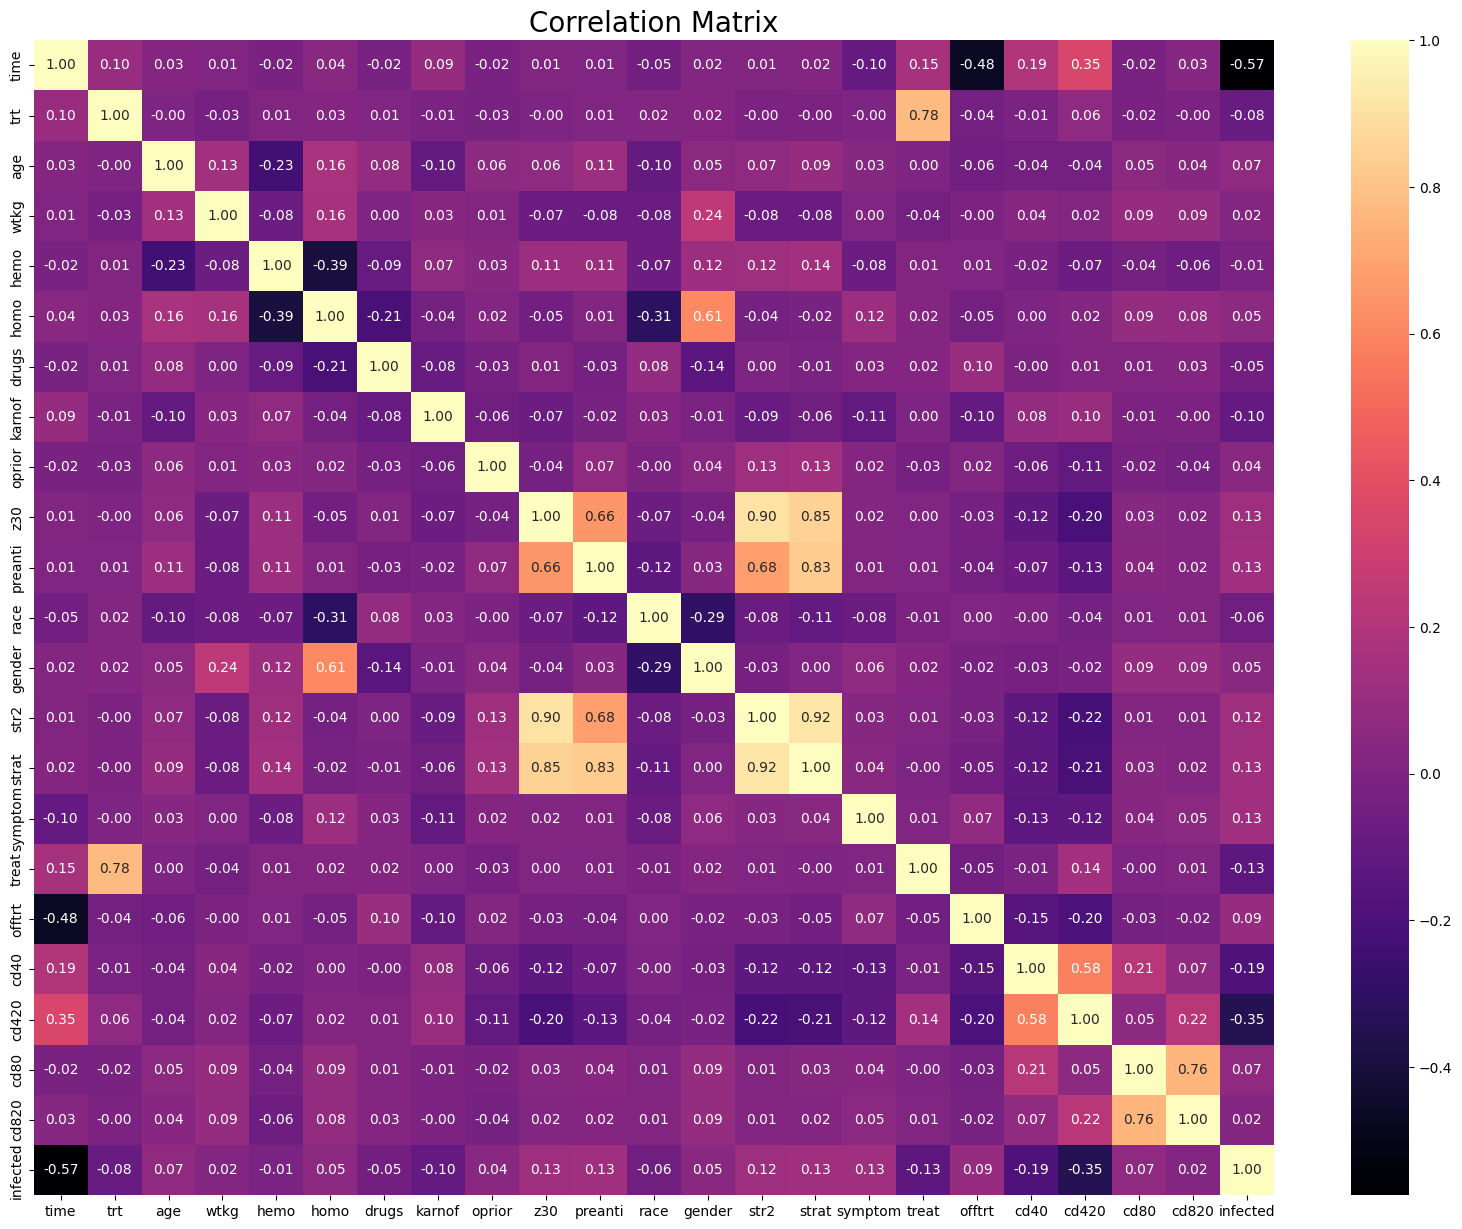

In [12]:
f,ax = plt.subplots(figsize=[20,15])
sns.heatmap(df.corr(), annot=True, fmt = '.2f', ax=ax, cmap='magma')
ax.set_title("Correlation Matrix", fontsize=20)
plt.show()

In [13]:
x = df.drop(['infected'], axis=1)
y = df['infected']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [15]:
# Building the Baseline Logistic Regression Model
baseline_model = LogisticRegression(random_state=42)
baseline_model.fit(X_train, y_train)
baseline_pred = baseline_model.predict(X_test)
baseline_accuracy = accuracy_score(y_test, baseline_pred)

print("\nbaseline_accuracy:")
print(baseline_accuracy)


baseline_accuracy:
0.8341121495327103


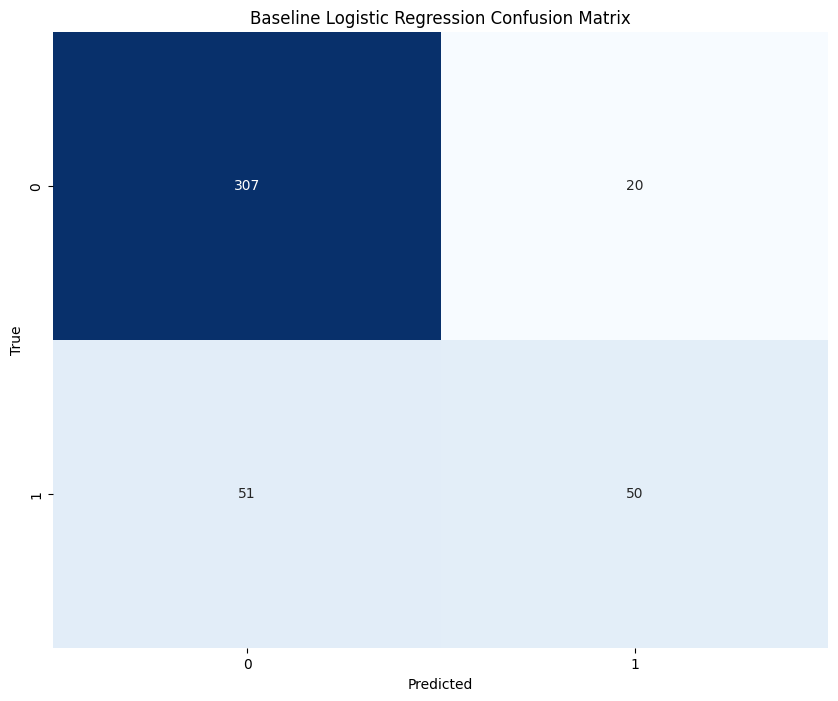

Accuracy: 0.8341121495327103
Precision: 0.7142857142857143
Recall: 0.49504950495049505
F1-score: 0.5847953216374269


In [16]:
baseline_conf_matrix = confusion_matrix(y_test, baseline_pred)

# Calculate performance metrics
accuracy = accuracy_score(y_test, baseline_pred)
precision = precision_score(y_test, baseline_pred)
recall = recall_score(y_test, baseline_pred)
f1 = f1_score(y_test, baseline_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(baseline_conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Baseline Logistic Regression Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Display performance metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

In [17]:
lr = LogisticRegression(random_state=42)

def objective_function(features):
    # Subset features based on PSO selected indices
    selected_features = X_train.iloc[:, features]
    
    # Train logistic regression model with selected features
    lr.fit(selected_features, y_train)
    
    # Predict on test set
    y_pred = lr.predict(X_test.iloc[:, features])
    
    # Calculate accuracy score
    accuracy = accuracy_score(y_test, y_pred)
    
    return -accuracy  # PSO minimizes the objective function, so we negate accuracy

# Define PSO parameters
n_particles = 10
n_iterations = 100
n_features = X_train.shape[1]

# Initialize particle positions and velocities
particles_position = np.random.randint(0, 2, size=(n_particles, n_features))  # Binary encoding for feature selection
particles_velocity = np.random.uniform(-1, 1, size=(n_particles, n_features))

# Initialize personal best positions
personal_best_position = particles_position.copy()

# Initialize global best position and global best value
global_best_position = np.zeros(n_features)
global_best_value = np.inf

# Run PSO
for _ in range(n_iterations):
    # Evaluate fitness for each particle
    for i in range(n_particles):
        features_indices = np.where(particles_position[i] == 1)[0]
        fitness = objective_function(features_indices)
        
        # Update personal best if fitness is better
        if fitness < objective_function(np.where(personal_best_position[i] == 1)[0]):
            personal_best_position[i] = particles_position[i].copy()
    
        # Update global best if fitness is better
        if fitness < global_best_value:
            global_best_position = particles_position[i].copy()
            global_best_value = fitness
    
    # Update particle velocities and positions
    for i in range(n_particles):
        # Update velocity
        r1, r2 = np.random.rand(), np.random.rand()  # Random values between 0 and 1
        inertia = 0.5  # Inertia weight
        cognitive_component = 1.5 * r1 * (personal_best_position[i] - particles_position[i])
        social_component = 1.5 * r2 * (global_best_position - particles_position[i])
        particles_velocity[i] = inertia * particles_velocity[i] + cognitive_component + social_component
        
        # Update position (binary encoding)
        # Using a sigmoid function for binary encoding
        sigmoid_func = 1 / (1 + np.exp(-particles_velocity[i]))
        particles_position[i] = np.where(np.random.rand(n_features) < sigmoid_func, 1, 0)
# Get selected features based on global best position
selected_features_indices = np.where(global_best_position == 1)[0]
selected_features = x.columns[selected_features_indices]

# Subset features based on selected indices
selected_train_features = X_train.iloc[:, selected_features_indices]
selected_test_features = X_test.iloc[:, selected_features_indices]

# Train logistic regression model with selected features
lr.fit(selected_train_features, y_train)

# Predict on test set
y_pred = lr.predict(selected_test_features)

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Selected features:", selected_features)

Accuracy: 0.866822429906542
Selected features: Index(['time', 'trt', 'wtkg', 'hemo', 'drugs', 'oprior', 'z30', 'preanti',
       'race', 'gender', 'str2', 'symptom', 'treat', 'offtrt', 'cd420',
       'cd80'],
      dtype='object')


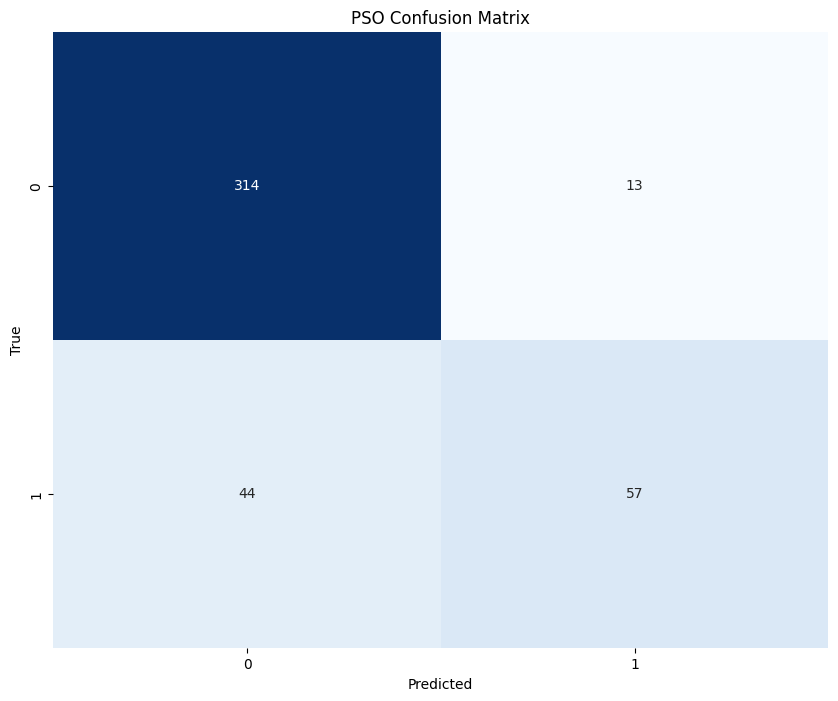

Accuracy: 0.866822429906542
Precision: 0.8142857142857143
Recall: 0.5643564356435643
F1-score: 0.6666666666666667


In [18]:
pso_conf_matrix = confusion_matrix(y_test, y_pred)

# Calculate performance metrics
accuracy_pso = accuracy_score(y_test, y_pred)
precision_pso = precision_score(y_test, y_pred)
recall_pso = recall_score(y_test, y_pred)
f1_pso = f1_score(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(pso_conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("PSO Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Display performance metrics
print("Accuracy:", accuracy_pso)
print("Precision:", precision_pso)
print("Recall:", recall_pso)
print("F1-score:", f1_pso)

In [19]:
# Define hyperparameters grid
param_grid = {
    'penalty': ['l1', 'l2'],  # Regularization penalty
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Inverse of regularization strength
    'solver': ['liblinear', 'saga']  # Optimization algorithm
}

# Initialize logistic regression model
logistic_regression = LogisticRegression(random_state=42)

# Grid search with 5-fold cross-validation
grid_search = GridSearchCV(estimator=logistic_regression, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and the best accuracy
best_params = grid_search.best_params_
best_accuracy = grid_search.best_score_

print("Best hyperparameters:", best_params)
print("Best accuracy:", best_accuracy)

Best hyperparameters: {'C': 100, 'penalty': 'l1', 'solver': 'liblinear'}
Best accuracy: 0.8632295023272467


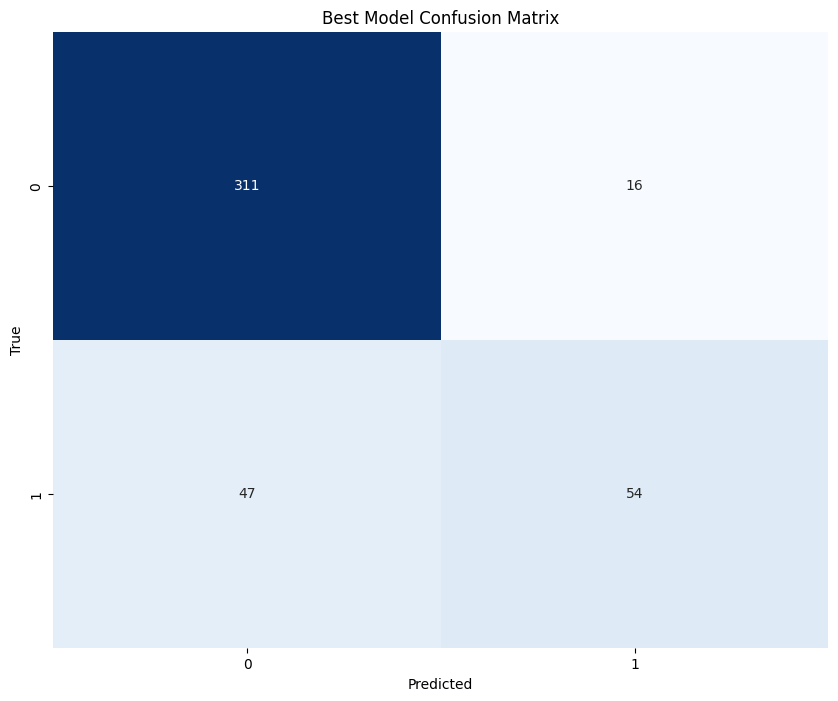

Accuracy: 0.852803738317757
Precision: 0.7714285714285715
Recall: 0.5346534653465347
F1-score: 0.6315789473684211


In [22]:
# Get the best model from grid search
best_model = grid_search.best_estimator_

# Make predictions on the test data
best_model_pred = best_model.predict(X_test)
cm = confusion_matrix(y_test, best_model_pred)

# Calculate performance metrics for the best model
accuracy_best = accuracy_score(y_test, best_model_pred)
precision_best = precision_score(y_test, best_model_pred)
recall_best = recall_score(y_test, best_model_pred)
f1_best = f1_score(y_test, best_model_pred)

# Plot confusion matrix for the best model
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Best Model Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Display performance metrics for the best model
print("Accuracy:", accuracy_best)
print("Precision:", precision_best)
print("Recall:", recall_best)
print("F1-score:", f1_best)